<a href="https://colab.research.google.com/github/orb-inc/tensorflow-deep-learning-projects/blob/main/01_neural_network_regression_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to regression with Neural Networks in TensorFlow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter... predicting a number.  

In [1]:
# Import TensorFlow
import tensorflow as tf
print(f'TensorFlow version is {tf.__version__}')

TensorFlow version is 2.12.0


## Creating data to view and fit 

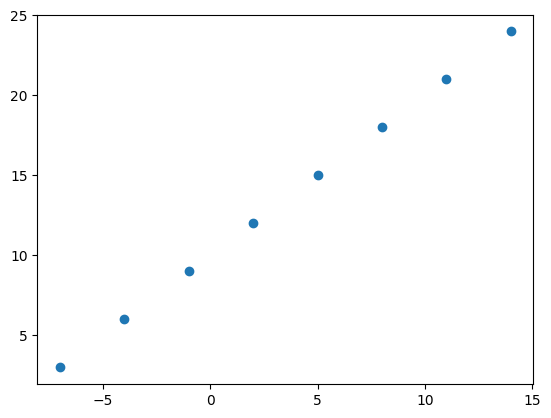

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize it
plt.scatter(X, y);

In [3]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and output shapes 

In [4]:
# Creat a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939_700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
input_shape = X.shape
output_shape = y.shape
input_shape, output_shape

((8,), (8,))

In [6]:
X[0], y[0]

(-7.0, 3.0)

In [7]:
X[1], y[1]

(-4.0, 6.0)

In [8]:
X[0].shape, y[0].shape

((), ())

In [9]:
X[0].ndim

0

In [10]:
# Turn our NumPy arrays into tensors 
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [11]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

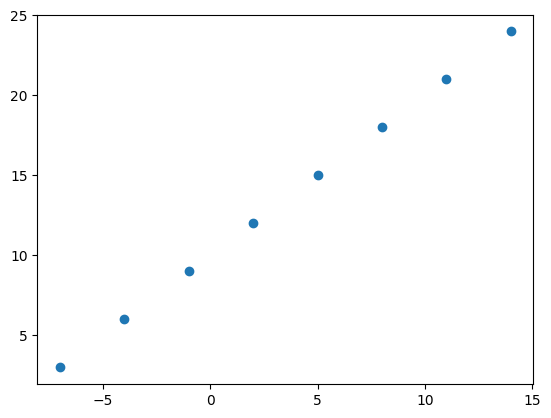

In [12]:
plt.scatter(X, y);

## Steps in modelling with TensorFlow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model. 
2. **Compile a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer(tells our model how to improve the patterns it's learning and evaluation metrics (what we can use to interpret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [13]:
# Set random seed 
tf.random.set_seed(42)

# Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
              optimizer=tf.keras.optimizers.SGD(), # sgd is short for stochastic gradient descent
              metrics=["mae"]) 

# 3. Fit the model 
model.fit(tf.expand_dims(X, -1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 672ms/step - loss: 13.0963 - mae: 13.0963
Epoch 2/5
1/1 [==============================] - 0s 16ms/step - loss: 12.9638 - mae: 12.9638
Epoch 3/5
1/1 [==============================] - 0s 14ms/step - loss: 12.8313 - mae: 12.8313
Epoch 4/5
1/1 [==============================] - 0s 12ms/step - loss: 12.6988 - mae: 12.6988
Epoch 5/5
1/1 [==============================] - 0s 12ms/step - loss: 12.5663 - mae: 12.5663


In [14]:
model.predict([17])

1/1 [==============================] - 0s 122ms/step


array([[4.985861]], dtype=float32)

## Improving our model 

We can improve our model, by altering the steps we took to create a model. 

1. **Creating a model** - here we might add more layers, increase the number of hidden units (also called neurons) within each of the hidden layers, change the activation function of each layer. 
2. **Compiling a model** - here we might change the optimization function or perhaps the **learning rate** of the optimization function. 
3. **Fitting a model** - here we might fit a model for more **epochs** (leave it training for longer) or on more data (give the model more examples to learn from). 
   

In [15]:
# Let's rebuild our model 

# Create the model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model (this time we'll train for longer)
model.fit(tf.expand_dims(X, -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 441ms/step - loss: 9.3057 - mae: 9.3057
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 9.1732 - mae: 9.1732
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 9.0407 - mae: 9.0407
Epoch 4/100
1/1 [==============================] - 0s 13ms/step - loss: 8.9082 - mae: 8.9082
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 8.7757 - mae: 8.7757
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 8.6432 - mae: 8.6432
Epoch 7/100
1/1 [==============================] - 0s 19ms/step - loss: 8.5107 - mae: 8.5107
Epoch 8/100
1/1 [==============================] - 0s 17ms/step - loss: 8.3782 - mae: 8.3782
Epoch 9/100
1/1 [==============================] - 0s 18ms/step - loss: 8.2457 - mae: 8.2457
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 8.1132 - mae: 8.1132
Epoch 11/100
1/1 [==============================] - 0s 16ms/step - l

In [16]:
# Remind ourself of the data 
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [17]:
# Let's see if our model's prediction has improved...
model.predict([17.0])

1/1 [==============================] - 0s 77ms/step


array([[30.084763]], dtype=float32)

In [18]:
# Trying to do this on my own 
# Let's rebuild a model 

# 1. Create a model 
model = tf.keras.Sequential([
    # tf.keras.layers.Dense(1),
    # tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(0.1),
              metrics=["mae"])

# Fit model
model.fit(tf.expand_dims(X, -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 1s 536ms/step - loss: 10.4813 - mae: 10.4813
Epoch 2/100
1/1 [==============================] - 0s 14ms/step - loss: 10.0313 - mae: 10.0313
Epoch 3/100
1/1 [==============================] - 0s 15ms/step - loss: 9.5813 - mae: 9.5813
Epoch 4/100
1/1 [==============================] - 0s 14ms/step - loss: 9.1313 - mae: 9.1313
Epoch 5/100
1/1 [==============================] - 0s 17ms/step - loss: 8.6813 - mae: 8.6813
Epoch 6/100
1/1 [==============================] - 0s 14ms/step - loss: 8.2313 - mae: 8.2313
Epoch 7/100
1/1 [==============================] - 0s 13ms/step - loss: 7.7813 - mae: 7.7813
Epoch 8/100
1/1 [==============================] - 0s 13ms/step - loss: 7.3313 - mae: 7.3313
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 6.9000 - mae: 6.9000
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 6.8262 - mae: 6.8262
Epoch 11/100
1/1 [==============================] - 0s 11ms/step

In [19]:
model.predict([17])

1/1 [==============================] - 0s 242ms/step


array([[27.236776]], dtype=float32)

In [20]:
# Let's see if we can make another change to improve our model 

# 1. Create the model (this time with an extra hidden layer with 100 hidden units)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(50, activation=None),
    tf.keras.layers.Dense(1)
]) 

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(0.01),
              metrics=["mae"])

# 3. Fit the model 
model.fit(tf.expand_dims(X, -1), y, epochs=100)

Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 12.5139 - mae: 12.5139
Epoch 2/100
1/1 [==============================] - 0s 28ms/step - loss: 11.8737 - mae: 11.8737
Epoch 3/100
1/1 [==============================] - 0s 25ms/step - loss: 11.2280 - mae: 11.2280
Epoch 4/100
1/1 [==============================] - 0s 31ms/step - loss: 10.5718 - mae: 10.5718
Epoch 5/100
1/1 [==============================] - 0s 18ms/step - loss: 9.9020 - mae: 9.9020
Epoch 6/100
1/1 [==============================] - 0s 25ms/step - loss: 9.2157 - mae: 9.2157
Epoch 7/100
1/1 [==============================] - 0s 30ms/step - loss: 8.5100 - mae: 8.5100
Epoch 8/100
1/1 [==============================] - 0s 20ms/step - loss: 7.7823 - mae: 7.7823
Epoch 9/100
1/1 [==============================] - 0s 14ms/step - loss: 7.0298 - mae: 7.0298
Epoch 10/100
1/1 [==============================] - 0s 17ms/step - loss: 6.8264 - mae: 6.8264
Epoch 11/100
1/1 [==============================] - 0s 19ms/ste

In [21]:
# Let's try to make a prediction
model.predict([17.0])

1/1 [==============================] - 0s 285ms/step


array([[26.428284]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural networks is:

```
Build a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it...
```


When it comes to evaluation... there are 3 words you should memorize:

> "Visualize", "visualize", "visualize"

It's a good idea to visualize:
* The data - What data are we working with? what does it look like?
* The model itself - what does our model look like?
* The training of a model - how does a model perform while it learns?
* The predictions of the model - how do the predictions of a model line up against the ground truth (the original labels)?

In [22]:
# Make a big dataset 
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [23]:
# Make labels for the dataset 
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

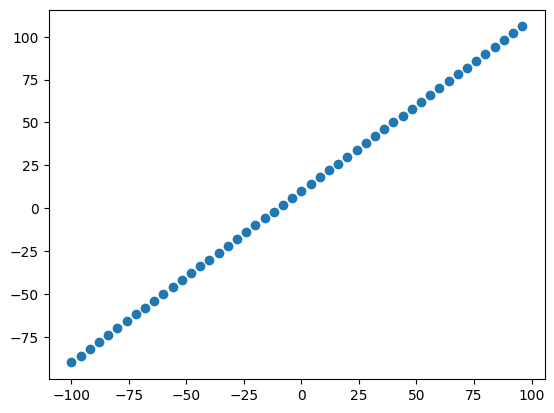

In [24]:
import matplotlib.pyplot as plt

plt.scatter(X, y);

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70%-80% of the total data you have available. 
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** - the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available.  

In [25]:
# Check the lenght of how many samples we have 
len(X)

50

In [26]:
# Split the data into train and test sets 
X_train = X[:40] # first 40 are training samples (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data 

Now we've got our data in training and test sets... let's visualize it again!

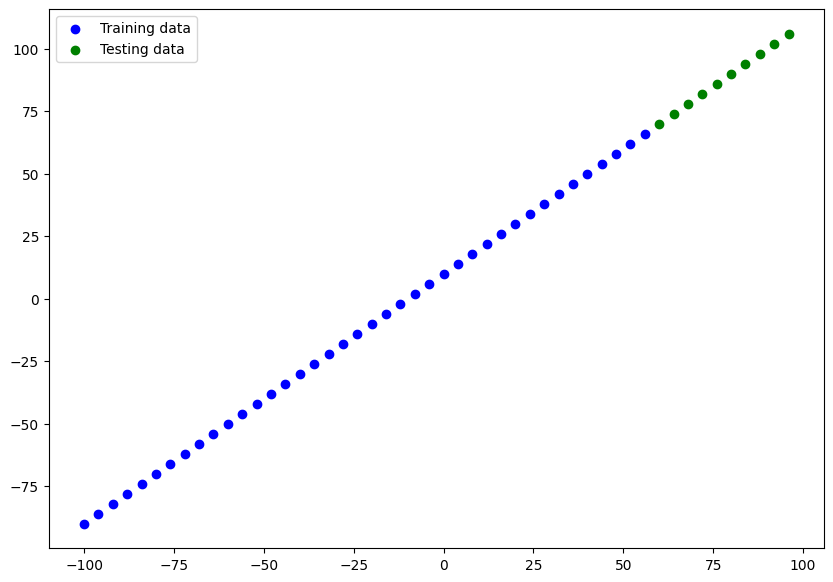

In [27]:
plt.figure(figsize=(10, 7))
# Plot training data in blue 
plt.scatter(X_train, y_train, c="b", label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c="g", label="Testing data")
# Show a legend 
plt.legend();

In [28]:
# Let's have a look at how to build a neural network for our data 

# 1. Create a model 
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=(["mae"]))

# 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

### Visualizing the model 

In [29]:
model.summary()

ValueError: ignored

In [30]:
X[0].shape

TensorShape([])

In [31]:
# Let's create a model which builds automatically by defining the input shape arguement in the first layer 
tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
    tf.keras.layers.Dense(1, name="output_layer")], name="model_1",
)

# 2. Compile the model (same as above)
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=(["mae"]))


In [32]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model. 
* The trainable parameters - these are the parameters (patterns) the model can update as it trains. 
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learned patterns or parameters from other models during **transfer learning**)

📖 **Resource:** For a more in-depth overview within a layer, check out MIT's introduction to deep learning video. 

🛠 **Exercise** Try playing around with the number of hidden units in the dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [33]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [34]:
# Get a summary of our model 
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


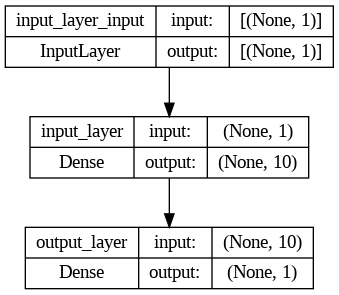

In [35]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)


### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the ground truth labels. 

Often you'll see this in the form of `y_test` or `y_true` versus `y_pred` (ground truth versus your model's predictions). 

In [36]:
# Make some predictions
y_pred = model. predict(X_test)
y_pred

1/1 [==============================] - 0s 114ms/step


array([[ 70.31279 ],
       [ 74.8865  ],
       [ 79.460205],
       [ 84.03391 ],
       [ 88.60762 ],
       [ 93.18133 ],
       [ 97.75504 ],
       [102.32876 ],
       [106.90245 ],
       [111.476166]], dtype=float32)

In [37]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a goog idea to turn it into a function. 

In [38]:
# Let's create a plotting function 
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  """
  Plots training data, test data and compares predictions to ground truth labels.
  """
  plt.figure(figsize=(10, 7))
  # Plot training data in blue 
  plt.scatter(train_data, train_labels, c="b", label="Training data") 
  # Plot testing data in green 
  plt.scatter(test_data, test_labels, c="g", label="Testing data")
  # Plot model's predictions in red 
  plt.scatter(test_data, predictions, c="r", label="Predictions")
  # Show the legend 
  plt.legend(); 


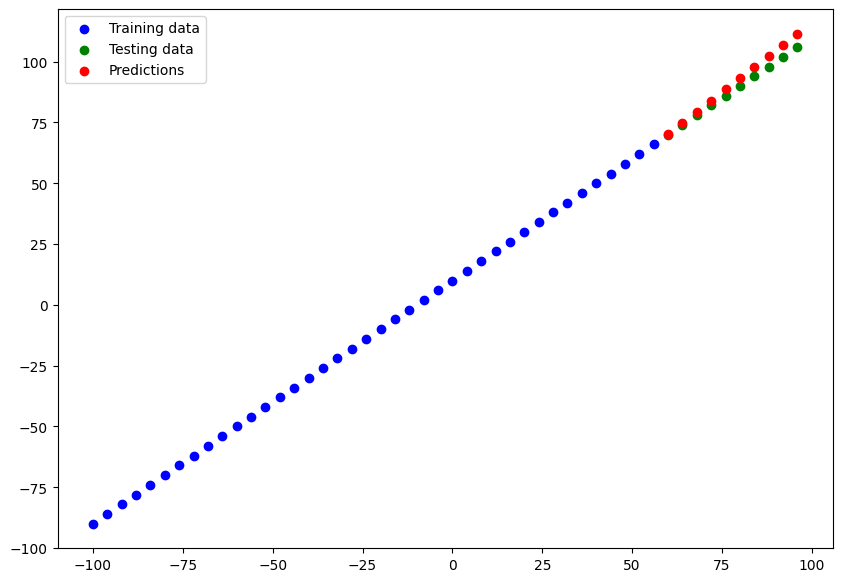

In [39]:
plot_predictions()

### Evaluating our model's predictions with regression evaluation metrics 

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance. 

Since we're working on a regression problem, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [40]:
# Evaluate the model on the test set 
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 322ms/step - loss: 2.8945 - mae: 2.8945


[2.8944764137268066, 2.8944764137268066]

In [41]:
# Calculate the mean absolute error 
mae = tf.keras.losses.MAE(y_true=y_test, 
                          y_pred=tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([17.749767, 14.268102, 11.815918, 10.393217, 10.      , 10.636266,
       12.302017, 15.063006, 18.90245 , 23.476166], dtype=float32)>

In [42]:
tf.constant(y_pred)

<tf.Tensor: shape=(10, 1), dtype=float32, numpy=
array([[ 70.31279 ],
       [ 74.8865  ],
       [ 79.460205],
       [ 84.03391 ],
       [ 88.60762 ],
       [ 93.18133 ],
       [ 97.75504 ],
       [102.32876 ],
       [106.90245 ],
       [111.476166]], dtype=float32)>

In [43]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 70.31279 ,  74.8865  ,  79.460205,  84.03391 ,  88.60762 ,
        93.18133 ,  97.75504 , 102.32876 , 106.90245 , 111.476166],
      dtype=float32)>

In [44]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [45]:
# Calculate the mean absolute error 
mae = tf.metrics.mean_absolute_error(y_true=y_test,
                                     y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=2.8944771>

In [46]:
# Calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=y_test,
                                    y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=11.093416>

In [47]:
# Make some functions to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_test,
                                        y_pred=tf.squeeze(y_pred))
  
def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_test,
                                       y_pred=tf.squeeze(y_pred))

### Running experiment to improve our model 

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ...
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between features and labels).
2. Make your model larger (using a more complex model) - this might come in the form of more layers or more hidden units in each layer. 
3. Train for longer - give your model more of a chance to find patterns in the data.

Let's do 3 modelling experiments:

1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained for 100 epochs. 
3. `model_3` - 2 layers, trained for 500 epochs. 

**Build `model_1`** 


In [48]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create the model 
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 17ms/step - loss: 56.9058 - mae: 56.9058
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 22.5306 - mae: 22.5306
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 10.7613 - mae: 10.7613
Epoch 4/100
2/2 [==============================] - 0s 8ms/step - loss: 11.2208 - mae: 11.2208
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 12.4395 - mae: 12.4395
Epoch 6/100
2/2 [==============================] - 0s 8ms/step - loss: 9.6243 - mae: 9.6243
Epoch 7/100
2/2 [==============================] - 0s 8ms/step - loss: 8.7343 - mae: 8.7343
Epoch 8/100
2/2 [==============================] - 0s 11ms/step - loss: 9.0703 - mae: 9.0703
Epoch 9/100
2/2 [==============================] - 0s 8ms/step - loss: 19.1379 - mae: 19.1379
Epoch 10/100
2/2 [==============================] - 0s 12ms/step - loss: 10.3383 - mae: 10.3383
Epoch 11/100
2/2 [==============================] - 0s 10ms/st

1/1 [==============================] - 0s 65ms/step


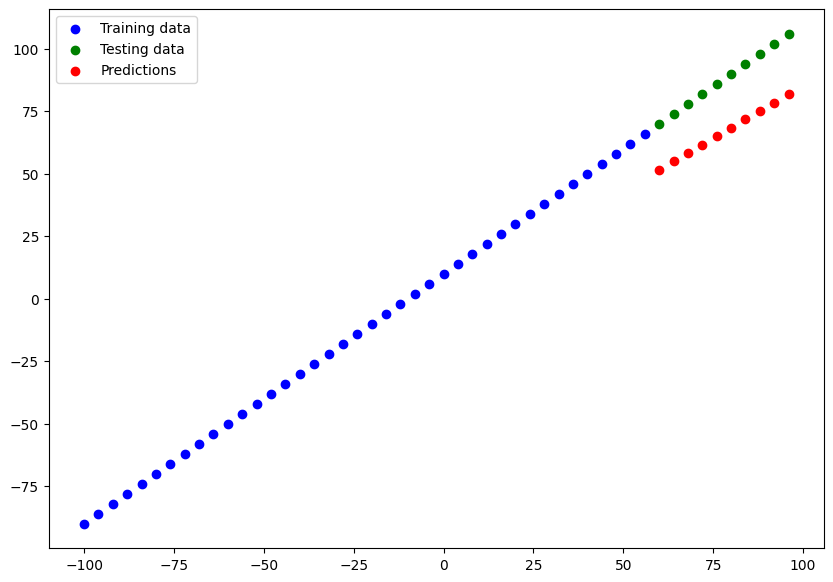

In [49]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [50]:
# Calculate model_1 evaluation metrics 

mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=21.299194>,
 <tf.Tensor: shape=(), dtype=float32, numpy=457.10117>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs 

In [51]:
# Set the random seed 
tf.random.set_seed(42)

# 1. Create the model 
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mse"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, -1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 1s 16ms/step - loss: 49.9204 - mse: 3853.6860
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 27.8412 - mse: 1004.0060
Epoch 3/100
2/2 [==============================] - 0s 8ms/step - loss: 32.7060 - mse: 1613.2700
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 28.6969 - mse: 1218.9833
Epoch 5/100
2/2 [==============================] - 0s 8ms/step - loss: 15.5603 - mse: 313.6710
Epoch 6/100
2/2 [==============================] - 0s 9ms/step - loss: 12.3376 - mse: 192.8669
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 11.6109 - mse: 165.0293
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 12.0120 - mse: 195.4443
Epoch 9/100
2/2 [==============================] - 0s 11ms/step - loss: 37.4725 - mse: 2160.3047
Epoch 10/100
2/2 [==============================] - 0s 8ms/step - loss: 25.1448 - mse: 886.7413
Epoch 11/100
2/2 [======================

1/1 [==============================] - 0s 73ms/step


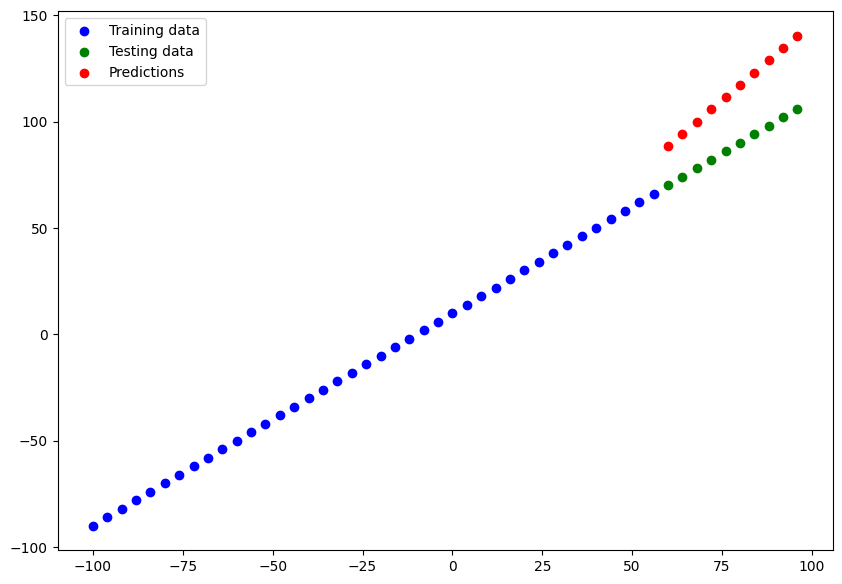

In [52]:
# Make and plot predictions for model_2
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [53]:
# Calculate model_2 evaluation metrics 

mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=26.361767>,
 <tf.Tensor: shape=(), dtype=float32, numpy=720.7908>)

**Build `model_3`**

2 dense layers, trained for 500 epochs

In [54]:
# Set the random seed 
tf.random.set_seed(42)

# 1. Create a model 
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, -1), y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 1s 14ms/step - loss: 47.4102 - mae: 47.4102
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 26.2830 - mae: 26.2830
Epoch 3/500
2/2 [==============================] - 0s 102ms/step - loss: 30.2042 - mae: 30.2042
Epoch 4/500
2/2 [==============================] - 0s 35ms/step - loss: 14.3118 - mae: 14.3118
Epoch 5/500
2/2 [==============================] - 0s 25ms/step - loss: 20.1019 - mae: 20.1019
Epoch 6/500
2/2 [==============================] - 0s 26ms/step - loss: 8.1667 - mae: 8.1667
Epoch 7/500
2/2 [==============================] - 0s 28ms/step - loss: 17.2109 - mae: 17.2109
Epoch 8/500
2/2 [==============================] - 0s 13ms/step - loss: 17.1711 - mae: 17.1711
Epoch 9/500
2/2 [==============================] - 0s 36ms/step - loss: 30.1710 - mae: 30.1710
Epoch 10/500
2/2 [==============================] - 0s 44ms/step - loss: 11.9606 - mae: 11.9606
Epoch 11/500
2/2 [==============================] 

1/1 [==============================] - 0s 65ms/step


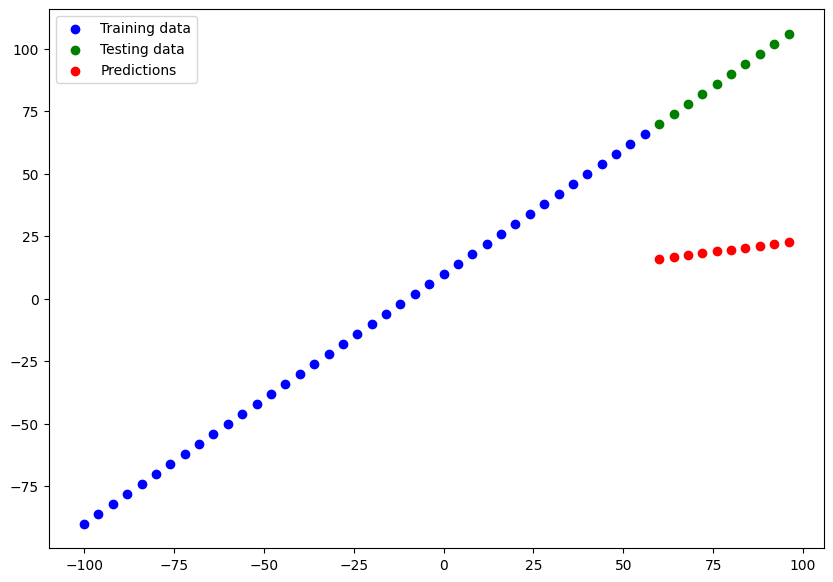

In [55]:
# Make and plot predictions for model_3
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [56]:
# Calculate model_3 evaluation metrics 

mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.69314>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4805.296>)

🔑 **Note:** You want to start with small experiments (small models) and make sure they work and then increase their scale when necessary.  

## Comparing the results of our experiments

We've run a few experiments, Let's compare the results.

In [57]:
# Let's compare our model's results using a pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model_1,21.299194,457.101166
1,model_2,26.361767,720.790771
2,model_3,68.693138,4805.295898


Looks like `model_2` performed the best...

In [58]:
model_2.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


> 🔑 **Note:** One of your main goals should be to minimize the time between your experiments. The more experiments you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practisioner's motto: "experiment, experiment, experiment". 

## Tracking your experiments 

One really good habit in machine learning modelling is to track the result of your experiments. 

When doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weight & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into TensorBoard).

## Saving our models

Saving our models allows us to use them outside of Google Colab (or wherever they were trained) such as in a web application or a mobile app. 

There are two main formats we can save our models to:

1. The SavedModel format 
2. The HDF5 format

In [59]:
# Save a model using the SavedModel format (This is the default saving format on TensorFlow)
model_2.save("best_model_SavedModel_format")

In [60]:
# Save model using the HDF5 format 
model_2.save("best_model_HDF5_format.h5")

## Loading in a saved model 

In [61]:
# Load in the SavedModel format model 
loaded_SavedModel_format = tf.keras.models.load_model('/content/best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Compare model_2 predictions with SavedModel format model predictions
model_2_preds = model_2.predict(X_test) 
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_2_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 152ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [63]:
# Loading a model using the .h5 format 
loaded_h5_model = tf.keras.models.load_model('/content/best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                20        
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [64]:
# Check to see if loaded .h5 model predictions match model_2
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
loaded_h5_model_preds == model_2_preds

1/1 [==============================] - 0s 106ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a model (or any other file) from Google Colab

If you want to download your files from Google Colab:

1. You can go to the "files" tab and right click on the file you're after and click "download".
2. Use code (see the cell below). 
2. Save it to Google Drive by connecting Google Drive and copying it there (see 2nd code cell below).

In [65]:
# Download a file from Google Colab
from google.colab import files
files.download("/content/best_model_HDF5_format.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [66]:
# Save a file from Google Colab to Google Drive (requires mounting Google Drive)
!cp /content/best_model_HDF5_format.h5 /content/drive/MyDrive/tensorflow_course

In [67]:
!ls /content/drive/MyDrive/tensorflow_course

best_model_HDF5_format.h5


## A larger example

In [68]:
# Import required libraries 
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
# Read in the insurance dataset 
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [70]:
insurance["sex"]

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [71]:
insurance.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [72]:
# Let's try one-hot encode our DataFrame so it's all numbers 
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [73]:
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [74]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop("charges", axis=1)
y = insurance_one_hot["charges"]


In [75]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [76]:
# View y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [77]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [78]:
 # Build a neural network (sort of like model_2 above)
tf.random.set_seed(42)

# 1. Create a model 
insurance_model = tf.keras.Sequential()
insurance_model.add(tf.keras.layers.Dense(10))
insurance_model.add(tf.keras.layers.Dense(1))

# 2. Compile the model 
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model 
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 3ms/step - loss: 8710.8096 - mae: 8710.8096
Epoch 2/100
34/34 [==============================] - 0s 4ms/step - loss: 7862.1689 - mae: 7862.1689
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7532.2627 - mae: 7532.2627
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 7692.7314 - mae: 7692.7314
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 7673.1025 - mae: 7673.1025
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7605.7915 - mae: 7605.7915
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 7670.9429 - mae: 7670.9429
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7742.1899 - mae: 7742.1899
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7573.6836 - mae: 7573.6836
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 7697.9751 - mae: 7697.9751

In [79]:
insurance_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 10)                120       
                                                                 
 dense_12 (Dense)            (None, 1)                 11        
                                                                 
Total params: 131
Trainable params: 131
Non-trainable params: 0
_________________________________________________________________


In [80]:
# Check the results of the insurance model on the test data 
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 7743.0493 - mae: 7743.0493


[7743.04931640625, 7743.04931640625]

Right now it looks like our model isn't performing too well... let's try and improve it!

To (try) improve our model, we'll run 2 experiments:
1. Add an extra layer with more hidden units and use the Adam optimizer. 
2. Same as above but train for longer (200 epochs). 
3. (insert your own experiment here) 

In [81]:
# Set random seed
tf.random.set_seed(42)

# Create the model 
insurance_model_2 = tf.keras.Sequential()
insurance_model_2.add(tf.keras.layers.Dense(100))
insurance_model_2.add(tf.keras.layers.Dense(10))
insurance_model_2.add(tf.keras.layers.Dense(1))

# Compile the model 
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model 
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
34/34 [==============================] - 1s 4ms/step - loss: 13259.9072 - mae: 13259.9072
Epoch 2/100
34/34 [==============================] - 0s 3ms/step - loss: 13036.5020 - mae: 13036.5020
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 12577.3955 - mae: 12577.3955
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 11724.7061 - mae: 11724.7061
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 10419.8740 - mae: 10419.8740
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 8935.9062 - mae: 8935.9062
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 7800.7041 - mae: 7800.7041
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7450.0947 - mae: 7450.0947
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7402.8174 - mae: 7402.8174
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7383.1626 - mae:

In [82]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 4653.4214 - mae: 4653.4214


[4653.42138671875, 4653.42138671875]

In [83]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 11ms/step - loss: 7743.0493 - mae: 7743.0493


[7743.04931640625, 7743.04931640625]

In [84]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (same as above)
insurance_model_3 = tf.keras.Sequential()
insurance_model_3.add(tf.keras.layers.Dense(100))
insurance_model_3.add(tf.keras.layers.Dense(10))
insurance_model_3.add(tf.keras.layers.Dense(1))

# Compile the model 
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model 
history = insurance_model_3.fit(X_train, y_train, epochs=200, verbose=1)

Epoch 1/200
34/34 [==============================] - 3s 5ms/step - loss: 13297.7061 - mae: 13297.7061
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 13144.9414 - mae: 13144.9414
Epoch 3/200
34/34 [==============================] - 0s 5ms/step - loss: 12823.4443 - mae: 12823.4443
Epoch 4/200
34/34 [==============================] - 0s 8ms/step - loss: 12195.4492 - mae: 12195.4492
Epoch 5/200
34/34 [==============================] - 0s 6ms/step - loss: 11136.6758 - mae: 11136.6758
Epoch 6/200
34/34 [==============================] - 0s 6ms/step - loss: 9729.6172 - mae: 9729.6172
Epoch 7/200
34/34 [==============================] - 0s 6ms/step - loss: 8356.4248 - mae: 8356.4248
Epoch 8/200
34/34 [==============================] - 0s 9ms/step - loss: 7593.8022 - mae: 7593.8022
Epoch 9/200
34/34 [==============================] - 0s 7ms/step - loss: 7436.2661 - mae: 7436.2661
Epoch 10/200
34/34 [==============================] - 0s 8ms/step - loss: 7413.2070 - mae:

In [85]:
# Evaluate our third model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3507.5415 - mae: 3507.5415


[3507.54150390625, 3507.54150390625]

In [86]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 7743.0493 - mae: 7743.0493


[7743.04931640625, 7743.04931640625]

Text(0.5, 0, 'epochs')

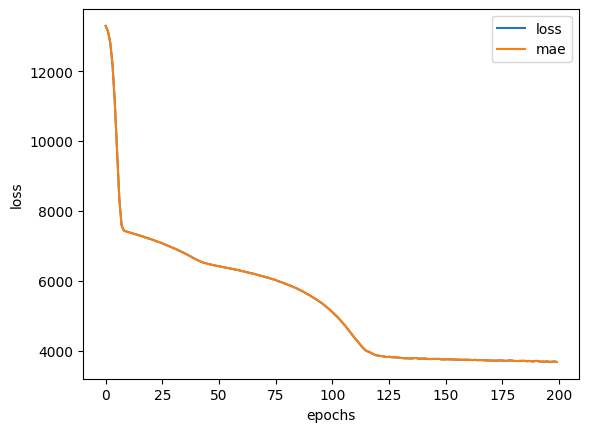

In [87]:
# Plot history (also known as a loss curve or a training curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

In [91]:
pd.DataFrame(history.history)

,loss,mae
0,13297.706055,13297.706055
1,13144.941406,13144.941406
2,12823.444336,12823.444336
3,12195.449219,12195.449219
4,11136.675781,11136.675781
...,...,...
195,3689.309570,3689.309570
196,3675.635986,3675.635986
197,3682.318359,3682.318359
198,3688.423096,3688.423096


> 🤔 **Question:** How long should you train for?

It depends. Really it depends on the problem you're working on. However many people have asked this question before... so TensorFlow has a solution! It's called the [EarlyStopping Callback] (https://www.tensorflow.org/api_docs/python/tf/keras/callbacks/EarlyStopping), which is a TensorFlow component you can add to your model to stop training once it stops improving a certain metric.  

## Preprocessing data (normalization and standardization)